In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from scipy.stats import boxcox
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(20, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

In [ ]:
sales_of_company_x = sales_of_company_x.iloc[:,1]

In [ ]:
sales_of_company_x

array([-0.47260441, -0.27388875, -0.39863914, -0.30830136,  0.49401851,
        0.47633945,  0.57602182,  0.21720882,  0.28051358,  0.06947237,
       -0.19583528, -0.20294084, -0.52763274, -0.27087495, -0.13036182,
       -0.01273903,  0.15415068,  0.60713431,  0.0119049 ,  0.53652797,
        0.18289809,  0.07760125, -0.61372005,  0.09396579, -0.76278087,
        0.02843794, -0.23017758, -0.12516314,  0.27763174,  0.31015493,
        0.44658336,  0.4622724 ,  0.31709596,  0.05908892, -0.40341802,
        0.05954139, -0.28191837, -0.15287436, -0.46288616,  0.04845238,
       -0.02047853,  0.43043803,  0.19863029,  0.49227222,  0.2298625 ,
        0.0887955 , -0.27040302,  0.10364598, -0.24856036, -0.2976324 ,
       -0.35667494, -0.06899287, -0.05236799,  0.28364166,  0.32834211,
        0.30215411,  0.38220825,  0.04457963, -0.15321347,  0.00490598,
       -0.4471031 , -0.36179004,  0.16507975, -0.53280453,  0.30732907,
        0.23166743,  0.22067136,  0.51625639,  0.23693283,  0.04

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


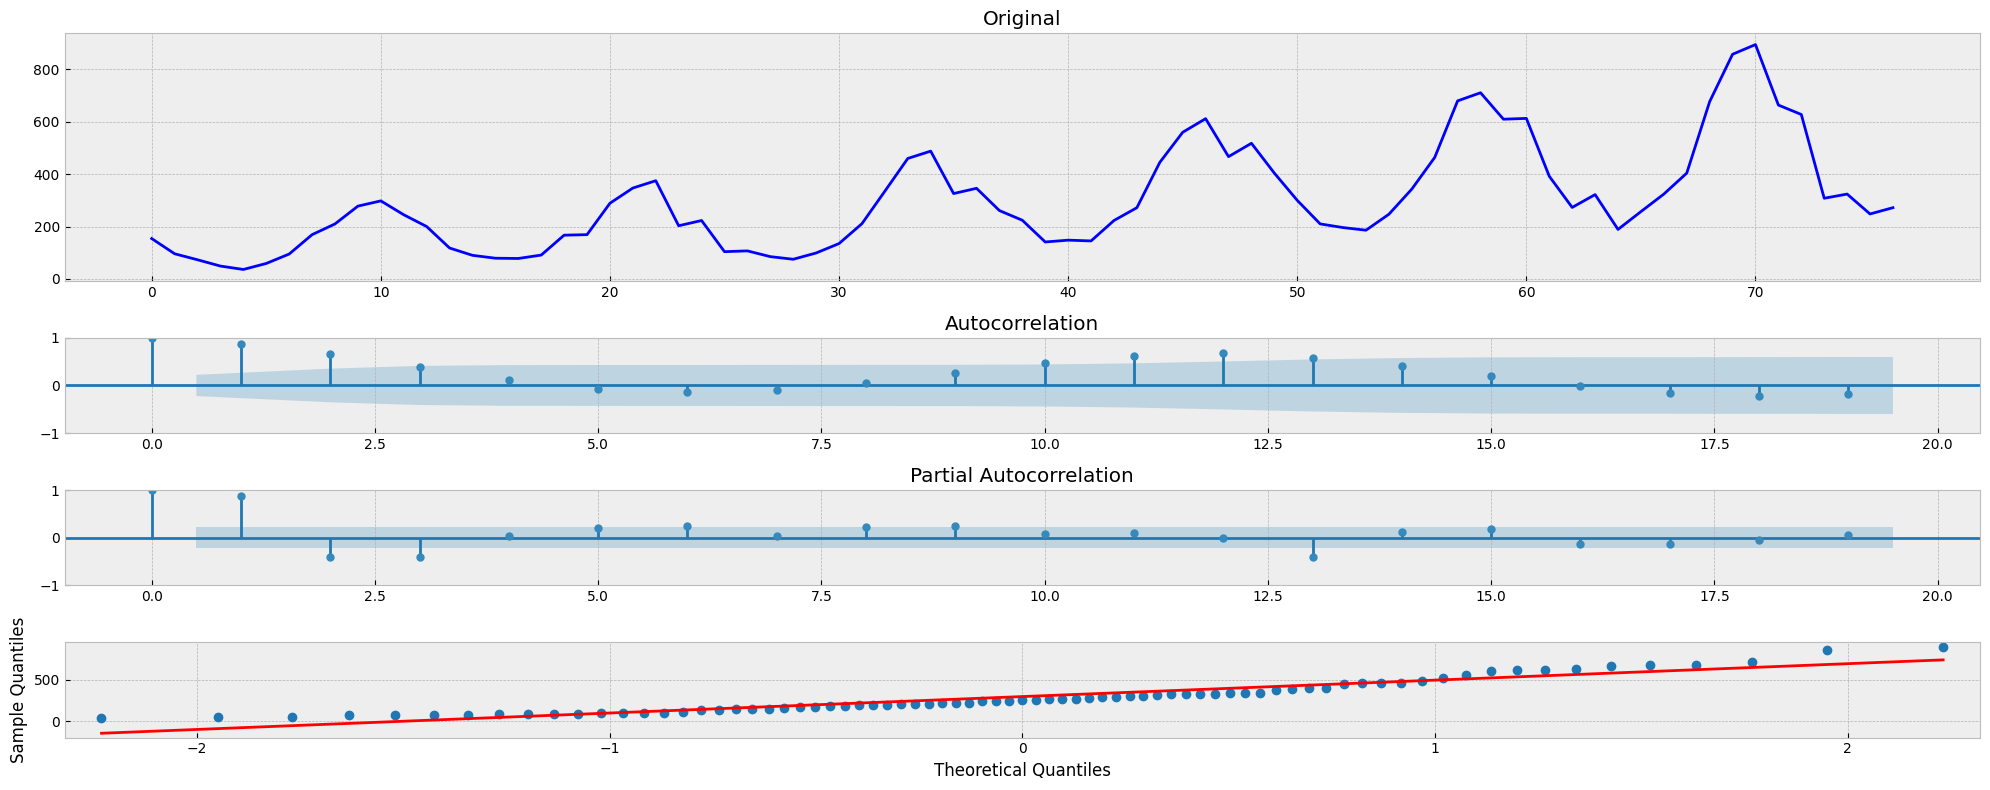

In [ ]:
tsplot(sales_of_company_x)

In [ ]:
sales_of_company_x = boxcox(sales_of_company_x, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


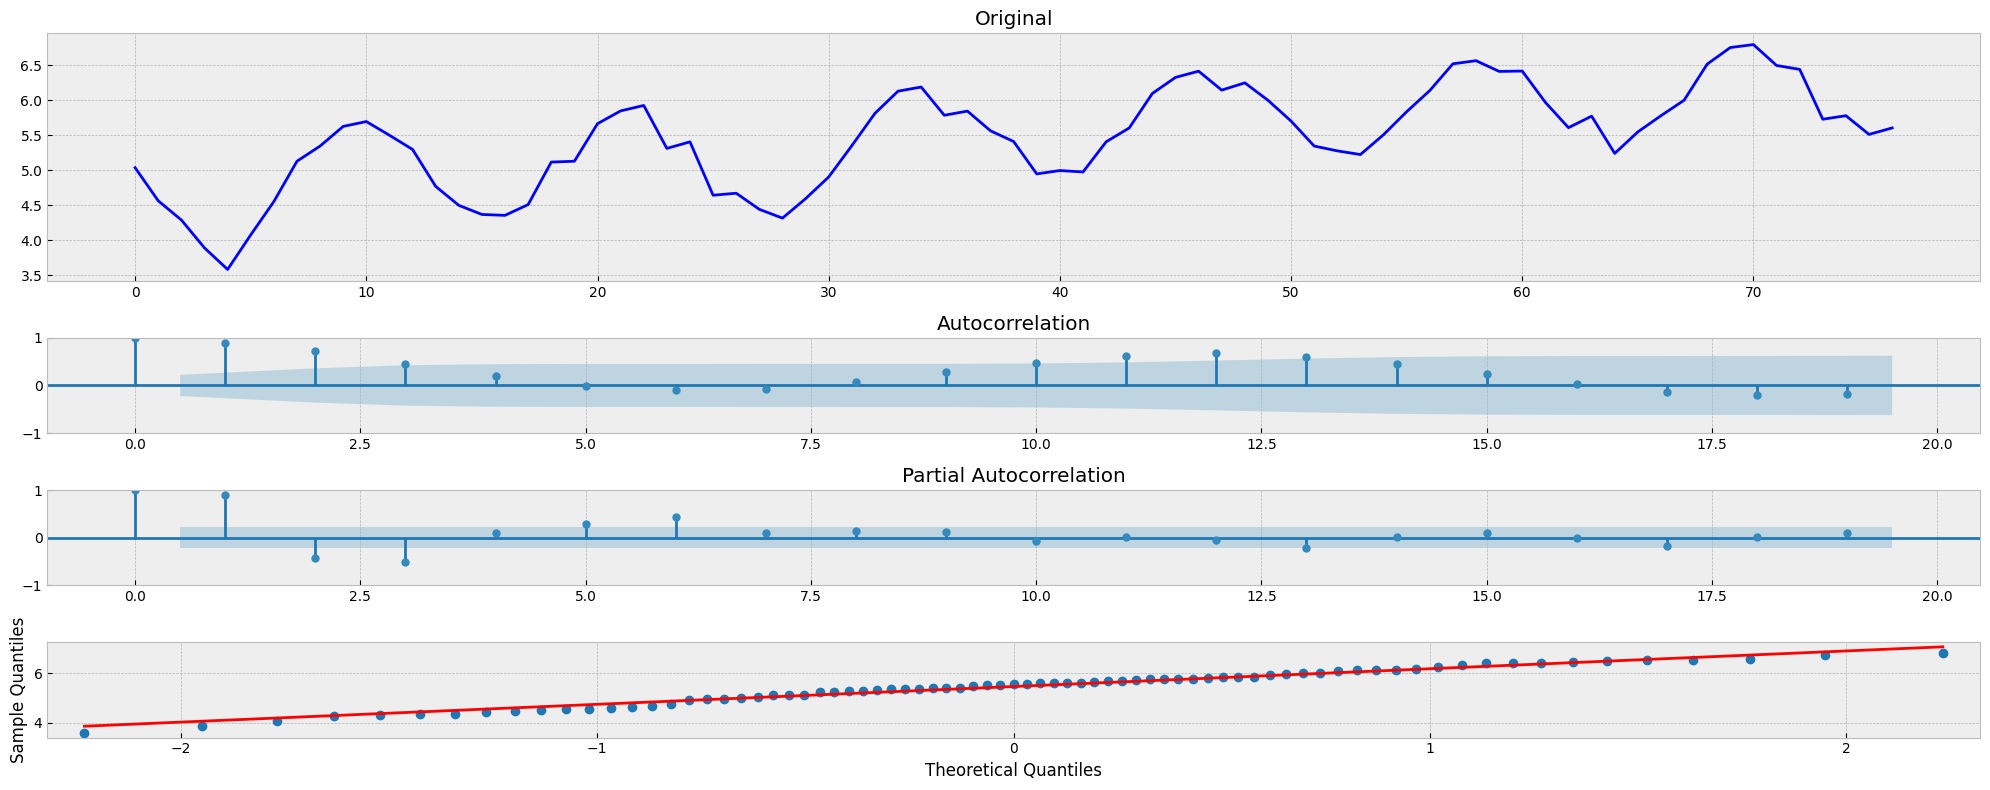

In [ ]:
tsplot(sales_of_company_x)

In [ ]:
sales_of_company_x = sales_of_company_x[1:] - sales_of_company_x[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


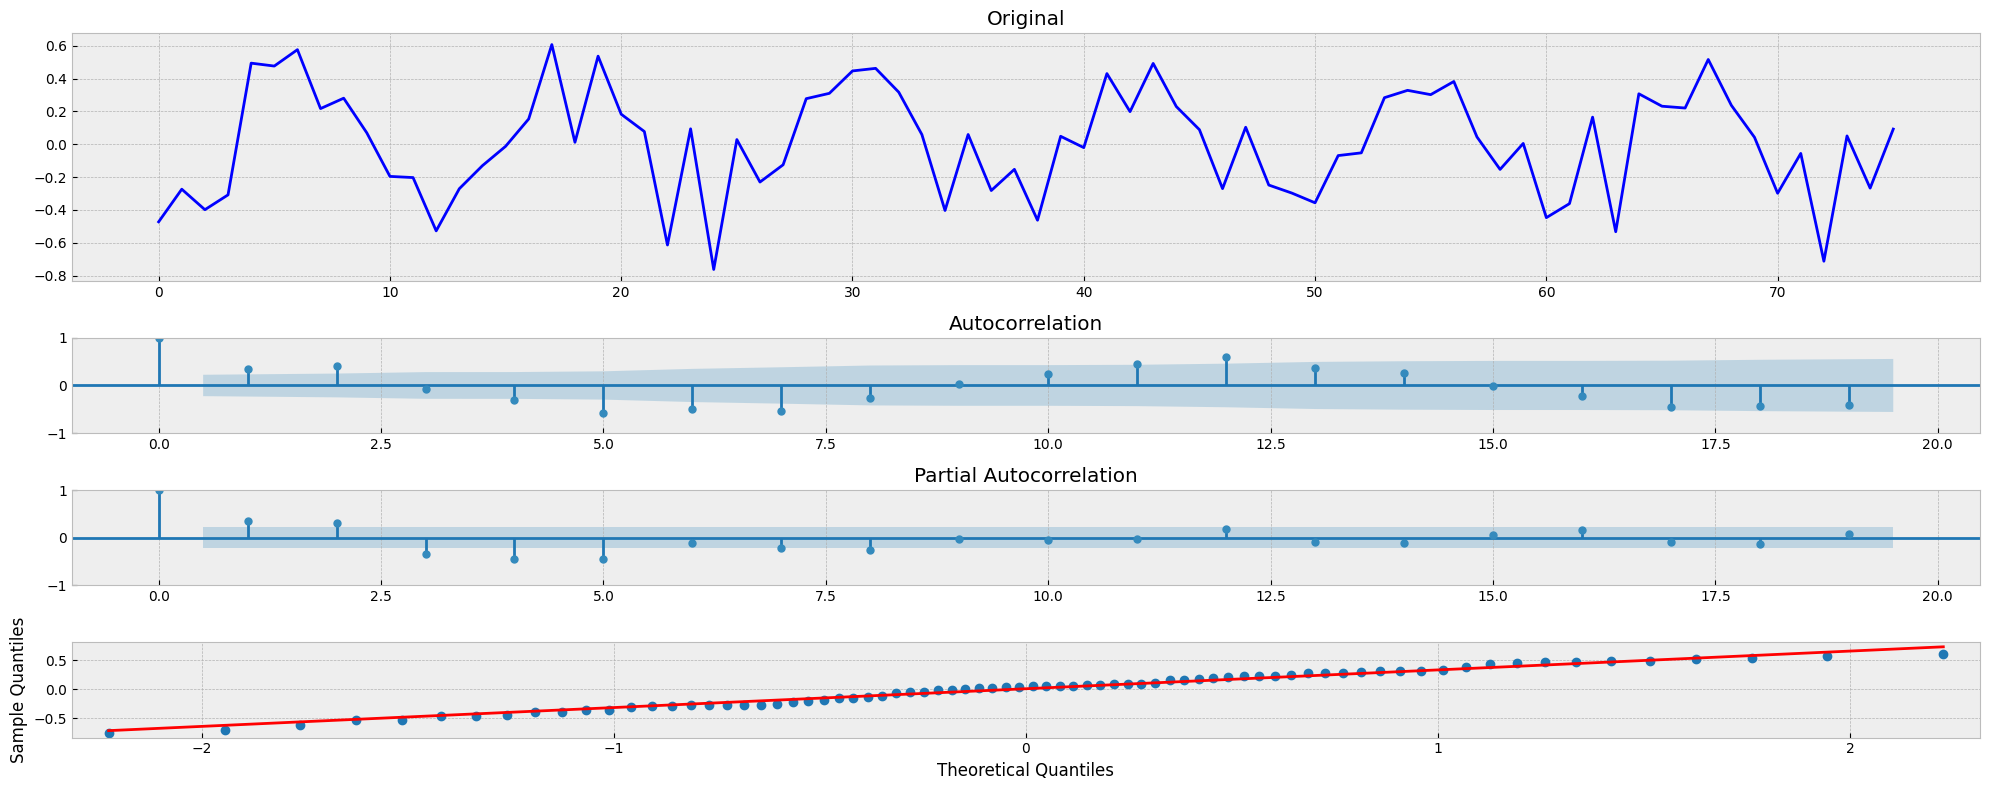

In [ ]:
tsplot(sales_of_company_x)

In [ ]:
best_aic = np.inf
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(sales_of_company_x, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=30)

aic:    inf | order: None


AttributeError: 'NoneType' object has no attribute 'resid'

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = ARIMA(sales_of_company_x, order=(p, d, q))
                results = model.fit()
                aic = results.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

print(f'Best AIC: {best_aic} | Best Order: {best_order}')

Best AIC: -10.964572947274572 | Best Order: (2, 0, 2)


In [ ]:
model = ARIMA(sales_of_company_x, order=best_order)
results = model.fit()

In [ ]:
forecast_steps = 12
forecast = results.forecast(steps=forecast_steps)

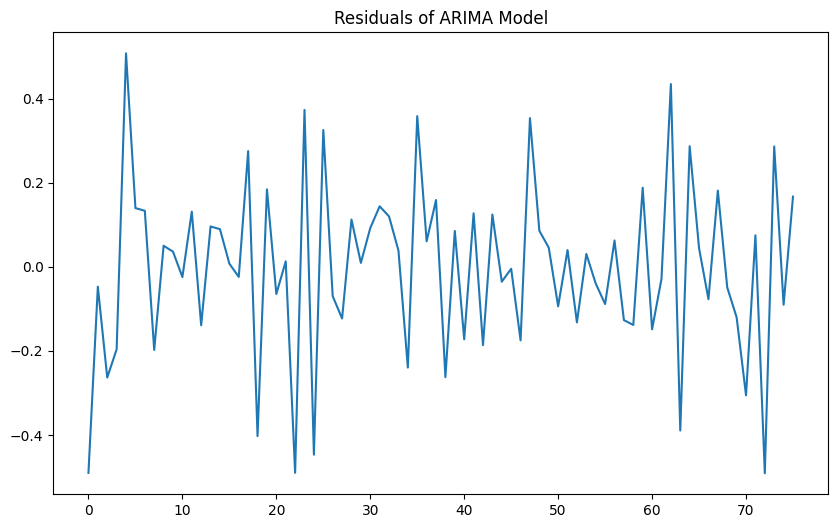

In [ ]:
residuals = results.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

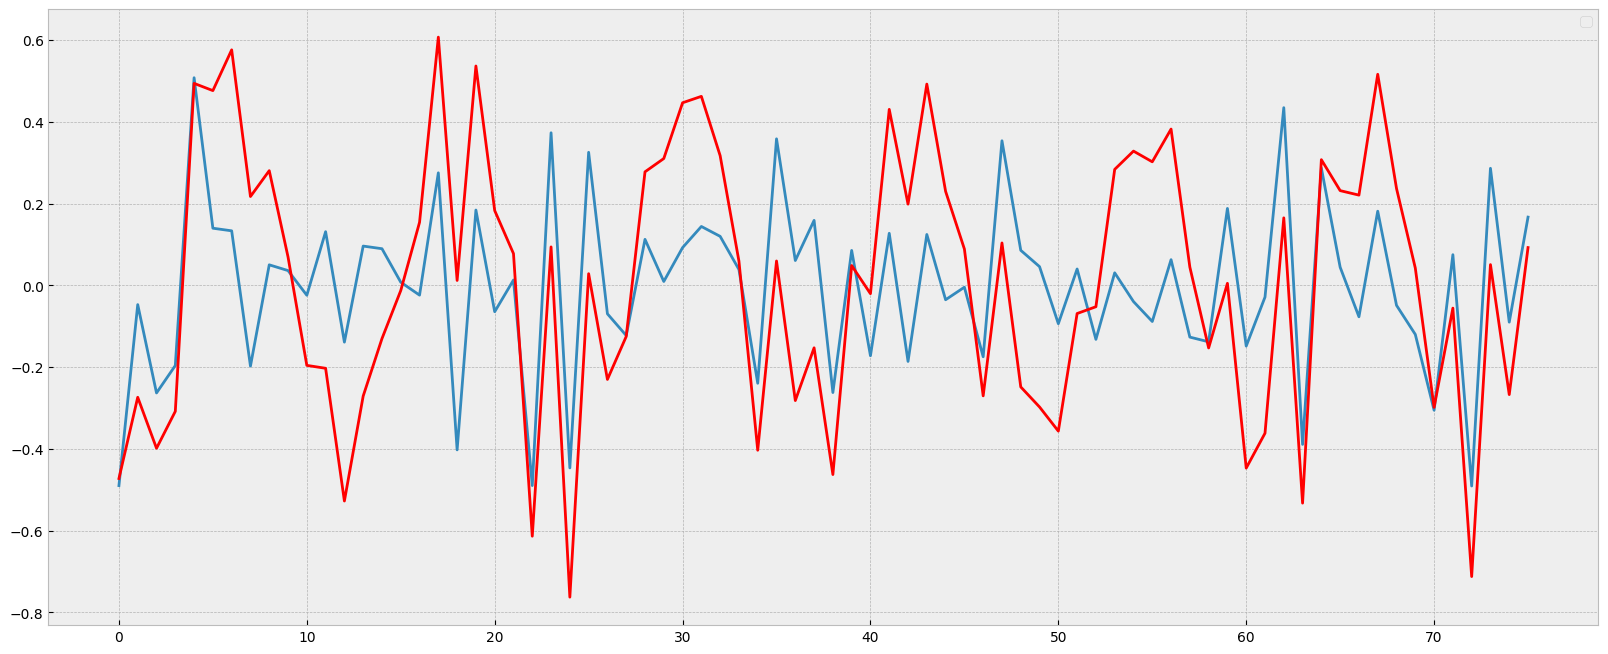

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(20,8))
    ax = plt.axes()
    plt.plot(residuals)
    plt.plot(sales_of_company_x, color='red')
    plt.legend()
    plt.show()